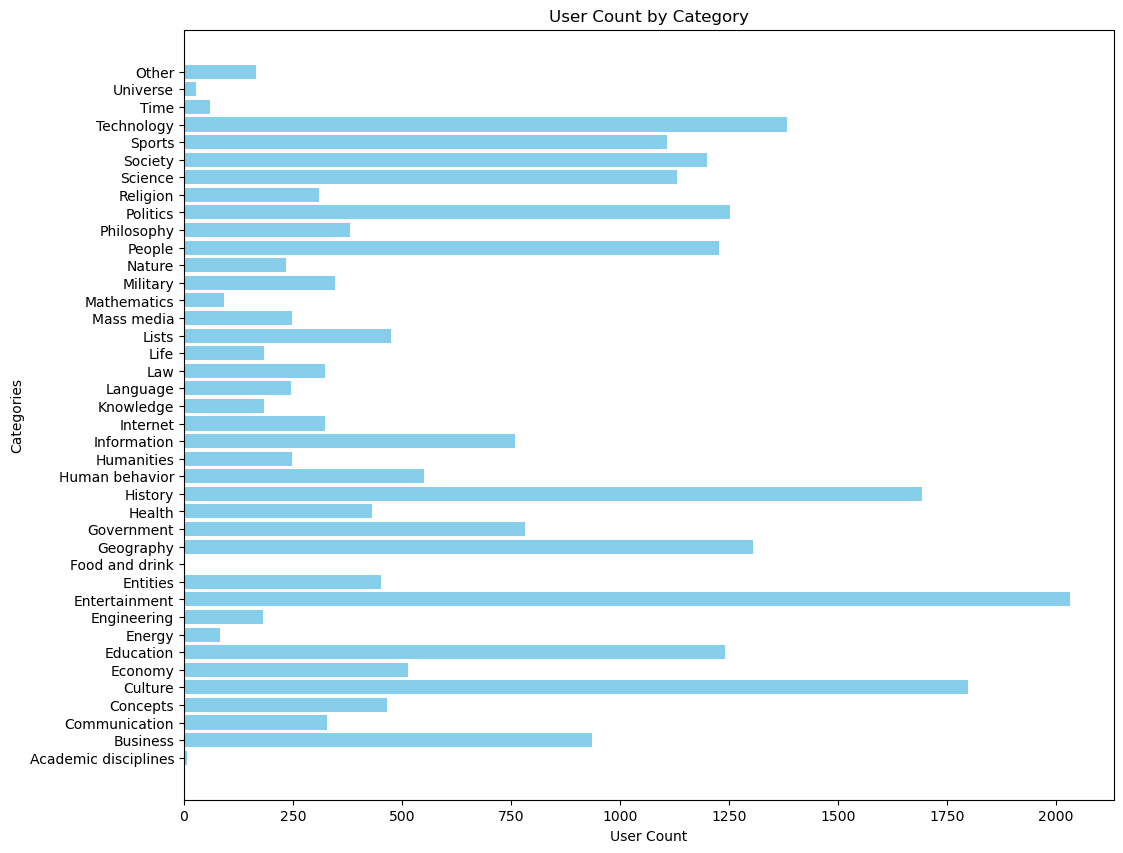

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import os

# Read the data from classifications.txt file
file_path = os.path.join('..', '..', 'data', 'classifications.txt')
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Match format "Username: Topic1, Topic2, ..."
        match = re.match(r'^(.*?):\s*(.*)$', line.strip())
        if match:
            user = match.group(1).strip()
            topics_str = match.group(2)
            # Split topics by commas and 'and' conjunctions, then clean spaces
            topics = [topic.strip() for topic in re.split(r',|\band\b', topics_str)]
            data.append({"user": user, "topics": topics})

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Count occurrences of each topic across all users
topic_counts = Counter(topic for topics in df["topics"] for topic in topics)

# Provided categories list
categories = [
    "Academic disciplines", "Business", "Communication", "Concepts", "Culture", "Economy", "Education", "Energy",
    "Engineering", "Entertainment", "Entities", "Food and drink", "Geography", "Government", "Health", "History",
    "Human behavior", "Humanities", "Information", "Internet", "Knowledge", "Language", "Law", "Life", "Lists", 
    "Mass media", "Mathematics", "Military", "Nature", "People", "Philosophy", "Politics", "Religion", "Science", 
    "Society", "Sports", "Technology", "Time", "Universe", "Other"
]

# Creating a DataFrame for the counts, using the provided category order
topic_counts_df = pd.DataFrame({"Topic": categories})
topic_counts_df["Count"] = topic_counts_df["Topic"].map(topic_counts).fillna(0).astype(int)

# Plotting the topics with their counts in the order provided
plt.figure(figsize=(12, 10))
plt.barh(topic_counts_df["Topic"], topic_counts_df["Count"], color="skyblue")
plt.xlabel("User Count")
plt.ylabel("Categories")
plt.title("User Count by Category")
plt.show()


In [12]:
# Get the top 5 and bottom 5 topics
top_5_topics = topic_counts_df.nlargest(5, 'Count')
bottom_5_topics = topic_counts_df.nsmallest(5, 'Count')

# Display the results
print("Top 5 Topics:")
print(top_5_topics)
print("\nBottom 5 Topics:")
print(bottom_5_topics)

Top 5 Topics:
            Topic  Count
9   Entertainment   2031
4         Culture   1797
15        History   1693
36     Technology   1384
12      Geography   1305

Bottom 5 Topics:
                   Topic  Count
11        Food and drink      0
0   Academic disciplines      7
38              Universe     28
37                  Time     60
7                 Energy     82


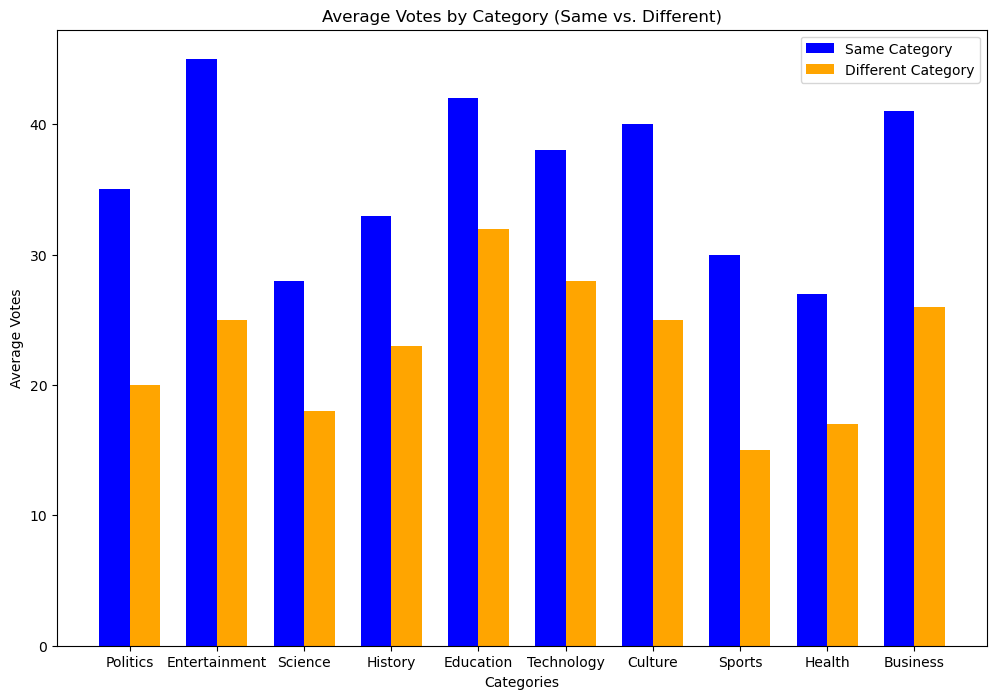

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Replace these with actual data: The 10 largest categories
categories = ['Politics', 'Entertainment', 'Science', 'History', 'Education', 
              'Technology', 'Culture', 'Sports', 'Health', 'Business']

# Replace with actual computed means for each category
# Mean votes for "Same Category" and "Different Category" for the 10 largest categories
mean_votes_same_category = [35, 45, 28, 33, 42, 38, 40, 30, 27, 41]  # Placeholder data
mean_votes_diff_category = [20, 25, 18, 23, 32, 28, 25, 15, 17, 26]  # Placeholder data

# Plotting "Same Category" and "Different Category" side by side for each category
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(categories))

# Bars for Same Category
ax.bar(index, mean_votes_same_category, bar_width, label='Same Category', color='blue')

# Bars for Different Category
ax.bar(index + bar_width, mean_votes_diff_category, bar_width, label='Different Category', color='orange')

# Adding labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Average Votes')
ax.set_title('Average Votes by Category (Same vs. Different)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


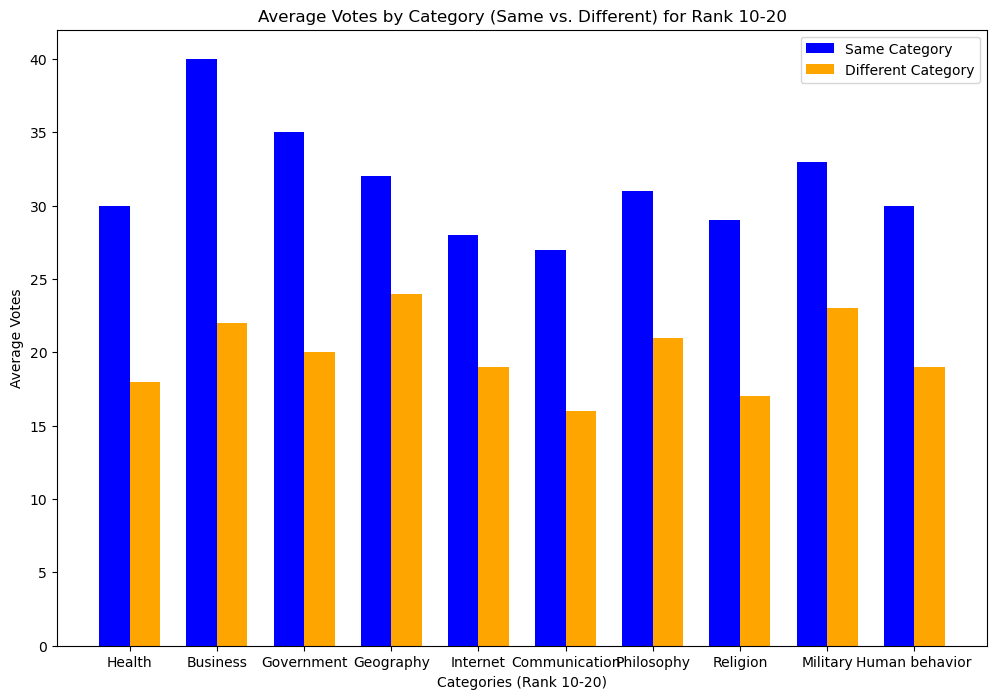

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Top categories ranked 10 to 20 in terms of user count
next_categories = ['Health', 'Business', 'Government', 'Geography', 'Internet', 
                   'Communication', 'Philosophy', 'Religion', 'Military', 'Human behavior']

# Replace with actual computed means for each category in the 10-20 range
mean_votes_same_category_10_20 = [30, 40, 35, 32, 28, 27, 31, 29, 33, 30]  # Placeholder data
mean_votes_diff_category_10_20 = [18, 22, 20, 24, 19, 16, 21, 17, 23, 19]  # Placeholder data

# Plotting for categories ranked 10-20
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(next_categories))

# Bars for Same Category
ax.bar(index, mean_votes_same_category_10_20, bar_width, label='Same Category', color='blue')

# Bars for Different Category
ax.bar(index + bar_width, mean_votes_diff_category_10_20, bar_width, label='Different Category', color='orange')

# Adding labels, title, and legend
ax.set_xlabel('Categories (Rank 10-20)')
ax.set_ylabel('Average Votes')
ax.set_title('Average Votes by Category (Same vs. Different) for Rank 10-20')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(next_categories)
ax.legend()

plt.show()


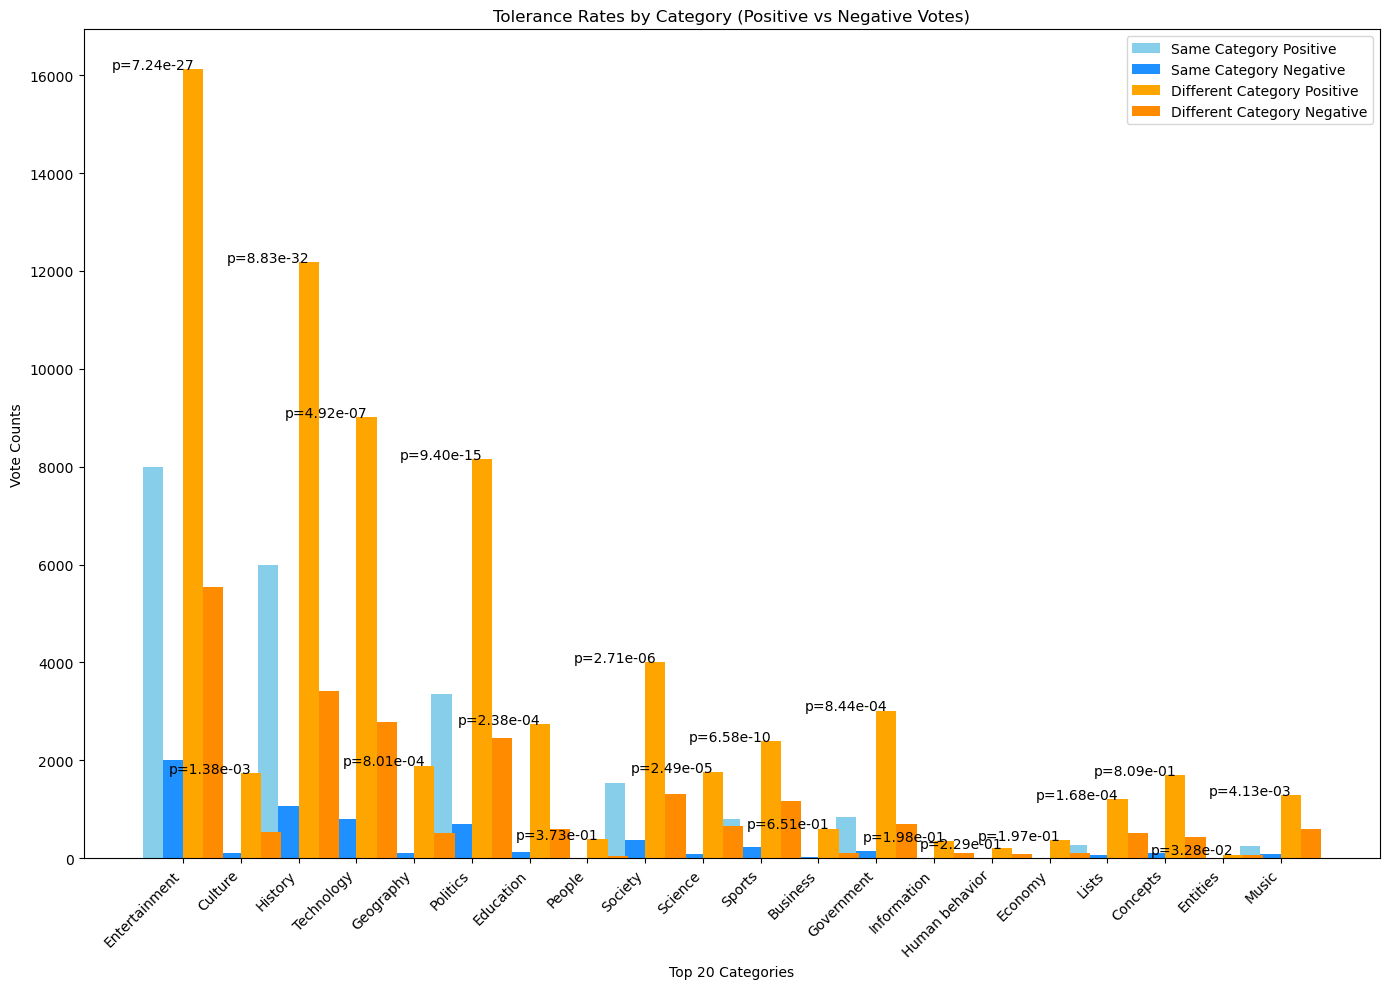

In [ ]:
import re
import pandas as pd
from collections import Counter
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Step 1: Parse classifications.txt to create a category mapping for each user
category_mapping = {}
with open('../../data/classifications.txt', 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("Here are the classifications"):  # Skip empty or irrelevant lines
            continue
        
        # Extract the username and categories
        match = re.match(r'^(.*?):\s*(.*)$', line)
        if match:
            user, categories_str = match.groups()
            categories = [cat.strip() for cat in categories_str.split(",")]
            category_mapping[user.strip()] = categories

# Flatten the category list to count occurrences and get the top 20 categories
all_categories = [cat for categories in category_mapping.values() for cat in categories]
top_20_categories = [cat for cat, _ in Counter(all_categories).most_common(20)]

# Step 2: Parse wiki-RfA.txt to extract votes and determine "Same Category" or "Different Category"
data = {
    "SRC": [],
    "TGT": [],
    "VOT": [],
    "Category_Same": [],  # New column to track if category matches
    "SRC_Category": [],  # Store source category
}

with open('../../data/wiki-RfA.txt', 'r', encoding='utf-8') as file:
    record = {}
    for line in file:
        line = line.strip()
        
        # Check if line is empty (end of a record)
        if not line:
            # Save the current record if it has data and reset
            if record:
                src_cat = set(category_mapping.get(record.get("SRC", ""), []))
                tgt_cat = set(category_mapping.get(record.get("TGT", ""), []))
                record["Category_Same"] = int(bool(src_cat & tgt_cat))  # 1 if any category matches, else 0
                record["SRC_Category"] = list(src_cat & set(top_20_categories))  # Intersection with top categories
                
                # Append record to data dictionary
                data["SRC"].append(record.get("SRC", ""))
                data["TGT"].append(record.get("TGT", ""))
                data["VOT"].append(int(record.get("VOT", 0)))
                data["Category_Same"].append(record["Category_Same"])
                data["SRC_Category"].append(record["SRC_Category"][0] if record["SRC_Category"] else None)
                record = {}
            continue
        
        # Match each line with its prefix and store it in the record dictionary
        match = re.match(r"^(SRC|TGT|VOT):(.*)$", line)
        if match:
            key, value = match.groups()
            record[key] = value.strip()

    # Add the last record if any data is left
    if record:
        src_cat = set(category_mapping.get(record.get("SRC", ""), []))
        tgt_cat = set(category_mapping.get(record.get("TGT", ""), []))
        record["Category_Same"] = int(bool(src_cat & tgt_cat))
        record["SRC_Category"] = list(src_cat & set(top_20_categories))
        
        data["SRC"].append(record.get("SRC", ""))
        data["TGT"].append(record.get("TGT", ""))
        data["VOT"].append(int(record.get("VOT", 0)))
        data["Category_Same"].append(record["Category_Same"])
        data["SRC_Category"].append(record["SRC_Category"][0] if record["SRC_Category"] else None)

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Step 3: Analyze tolerance rates for each of the 20 biggest categories
results = []
for category in top_20_categories:
    # Filter votes by users in the current category
    category_votes = df[df['SRC_Category'] == category]
    
    # Calculate positive and negative vote counts within and outside the category
    same_category_votes = category_votes[category_votes['Category_Same'] == 1]
    diff_category_votes = category_votes[category_votes['Category_Same'] == 0]
    
    same_pos_count = (same_category_votes['VOT'] == 1).sum()
    same_neg_count = (same_category_votes['VOT'] == -1).sum()
    diff_pos_count = (diff_category_votes['VOT'] == 1).sum()
    diff_neg_count = (diff_category_votes['VOT'] == -1).sum()
    
    # Set up contingency table and perform chi-square test
    contingency_table = [[same_pos_count, same_neg_count], [diff_pos_count, diff_neg_count]]
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Append results for this category
    results.append({
        "Category": category,
        "Same_Pos": same_pos_count,
        "Same_Neg": same_neg_count,
        "Diff_Pos": diff_pos_count,
        "Diff_Neg": diff_neg_count,
        "p_value": p_value
    })

# Convert results to a DataFrame for display and plotting
results_df = pd.DataFrame(results)

# Plotting the results as a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 10))
bar_width = 0.35
index = range(len(results_df))

# Bars for same-category positive and negative votes
ax.bar(index, results_df["Same_Pos"], bar_width, label="Same Category Positive", color="skyblue")
ax.bar([i + bar_width for i in index], results_df["Same_Neg"], bar_width, label="Same Category Negative", color="dodgerblue")

# Bars for different-category positive and negative votes
ax.bar([i + 2 * bar_width for i in index], results_df["Diff_Pos"], bar_width, label="Different Category Positive", color="orange")
ax.bar([i + 3 * bar_width for i in index], results_df["Diff_Neg"], bar_width, label="Different Category Negative", color="darkorange")

# Adding labels, title, and legend
ax.set_xlabel("Top 20 Categories")
ax.set_ylabel("Vote Counts")
ax.set_title("Tolerance Rates by Category (Positive vs Negative Votes)")
ax.set_xticks([i + 1.5 * bar_width for i inindex])
ax.set_xticklabels(results_df["Category"], rotation=45, ha="right")
ax.legend()

# Display the p-values for each category as annotations
for i, p_value in enumerate(results_df["p_value"]):
    ax.text(i, max(results_df["Same_Pos"][i], results_df["Same_Neg"][i], results_df["Diff_Pos"][i], results_df["Diff_Neg"][i]) + 5, 
            f"p={p_value:.2e}", ha="center")

plt.tight_layout()
plt.show()


In [16]:
# Select and rename columns for clarity
results_table = results_df[["Category", "Same_Pos", "Same_Neg", "Diff_Pos", "Diff_Neg", "p_value"]]
results_table.columns = ["Category", "Same Category Positive Votes", "Same Category Negative Votes", 
                         "Different Category Positive Votes", "Different Category Negative Votes", "p-value"]

# Display the table
print("Tolerance Analysis Results")
print(results_table)

Tolerance Analysis Results
          Category  Same Category Positive Votes  \
0    Entertainment                          7992   
1          Culture                           485   
2          History                          5997   
3       Technology                          3269   
4        Geography                           580   
5         Politics                          3357   
6        Education                           872   
7           People                            75   
8          Society                          1544   
9          Science                           381   
10          Sports                           801   
11        Business                           125   
12      Government                           848   
13     Information                            48   
14  Human behavior                            36   
15         Economy                            49   
16           Lists                           271   
17        Concepts                   

In [17]:
# Calculate tolerance rates for each category
results_df['Same Category Tolerance Rate'] = results_df['Same_Pos'] / (results_df['Same_Pos'] + results_df['Same_Neg'])
results_df['Different Category Tolerance Rate'] = results_df['Diff_Pos'] / (results_df['Diff_Pos'] + results_df['Diff_Neg'])

# Add a column to indicate if tolerance is higher in same or different category
results_df['Higher Tolerance'] = results_df.apply(
    lambda row: 'Same Category' if row['Same Category Tolerance Rate'] > row['Different Category Tolerance Rate'] else 'Different Category', 
    axis=1
)

# Displaying the enhanced table for interpretation
enhanced_results = results_df[[
    "Category", "Same_Pos", "Same_Neg", "Diff_Pos", "Diff_Neg", "p_value", 
    "Same Category Tolerance Rate", "Different Category Tolerance Rate", "Higher Tolerance"
]]
enhanced_results.columns = [
    "Category", "Same Category Positive Votes", "Same Category Negative Votes", 
    "Different Category Positive Votes", "Different Category Negative Votes", "p-value",
    "Same Category Tolerance Rate", "Different Category Tolerance Rate", "Higher Tolerance"
]

# Show the table
from IPython.display import display

# Display the DataFrame in a Jupyter Notebook
display(enhanced_results)


,Category,Same Category Positive Votes,Same Category Negative Votes,Different Category Positive Votes,Different Category Negative Votes,p-value,Same Category Tolerance Rate,Different Category Tolerance Rate,Higher Tolerance
0,Entertainment,7992,2004,16132,5546,7.240324e-27,0.799520,0.744165,Same Category
1,Culture,485,103,1738,543,1.375450e-03,0.824830,0.761947,Same Category
2,History,5997,1073,12183,3414,8.826538e-32,0.848232,0.781112,Same Category
3,Technology,3269,803,9014,2778,4.920231e-07,0.802800,0.764417,Same Category
4,Geography,580,107,1889,517,8.014258e-04,0.844250,0.785121,Same Category
5,Politics,3357,702,8154,2462,9.396100e-15,0.827051,0.768086,Same Category
6,Education,872,128,2743,594,2.377056e-04,0.872000,0.821996,Same Category
7,People,75,6,385,50,3.728141e-01,0.925926,0.885057,Same Category
8,Society,1544,367,4012,1303,2.707686e-06,0.807954,0.754845,Same Category
9,Science,381,81,1761,651,2.486214e-05,0.824675,0.730100,Same Category


Skipping file ../../data/admin_scores_ed3.csv due to parsing error.


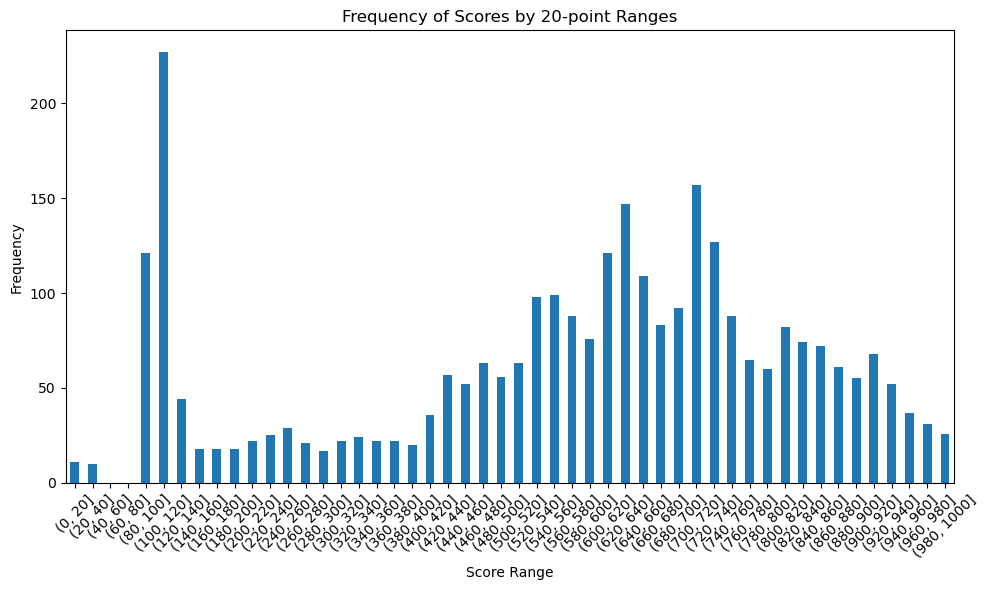

In [18]:
import glob

# Function to load and concatenate CSV files from a specific directory
def load_data(file_pattern):
    all_files = glob.glob(file_pattern)
    df_list = []
    for filename in all_files:
        try:
            df = pd.read_csv(filename)
            df_list.append(df)
        except pd.errors.ParserError:
            print(f"Skipping file {filename} due to parsing error.")
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

# Function to plot frequency by score range
def plot_score_frequency(data, score_column='total_score', range_size=10):
    # Ensure the score column is numeric, handling non-numeric values
    data[score_column] = pd.to_numeric(data[score_column], errors='coerce')
    data = data.dropna(subset=[score_column])  # Drop rows with NaN scores

    # Create bins based on the specified range size
    min_score = data[score_column].min()
    max_score = data[score_column].max()
    bins = range(int(min_score), int(max_score) + range_size, range_size)

    # Cut the data into bins and count the frequencies
    data = data.copy()  # Avoid SettingWithCopyWarning by working with a copy
    data.loc[:, 'Score Range'] = pd.cut(data[score_column], bins=bins)
    frequency = data['Score Range'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(10, 6))
    frequency.plot(kind='bar')
    plt.xlabel('Score Range')
    plt.ylabel('Frequency')
    plt.title(f'Frequency of Scores by {range_size}-point Ranges')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage
data = load_data('../../data/*.csv')

plot_score_frequency(data, score_column='total_score', range_size=20)


Skipping file ../../data/admin_scores_ed3.csv due to parsing error.


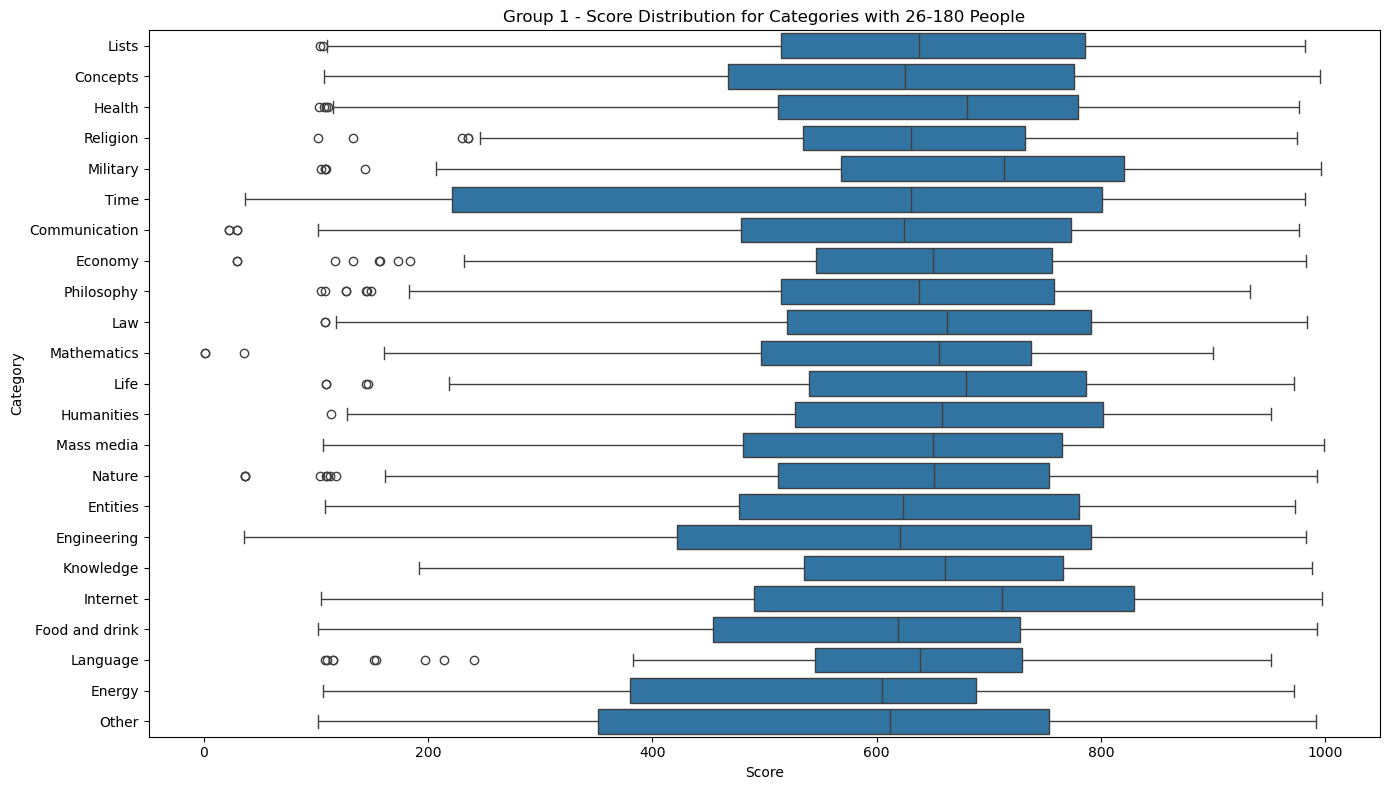

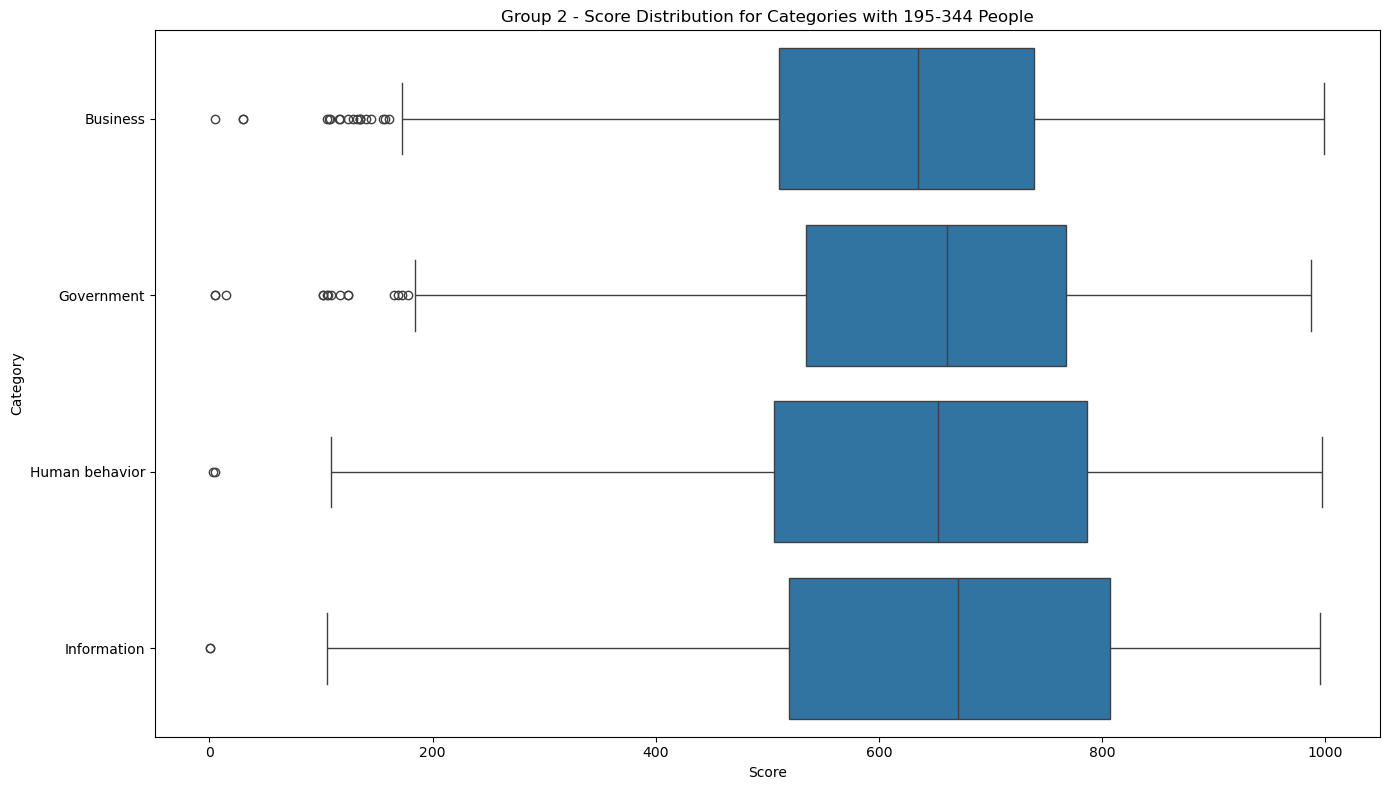

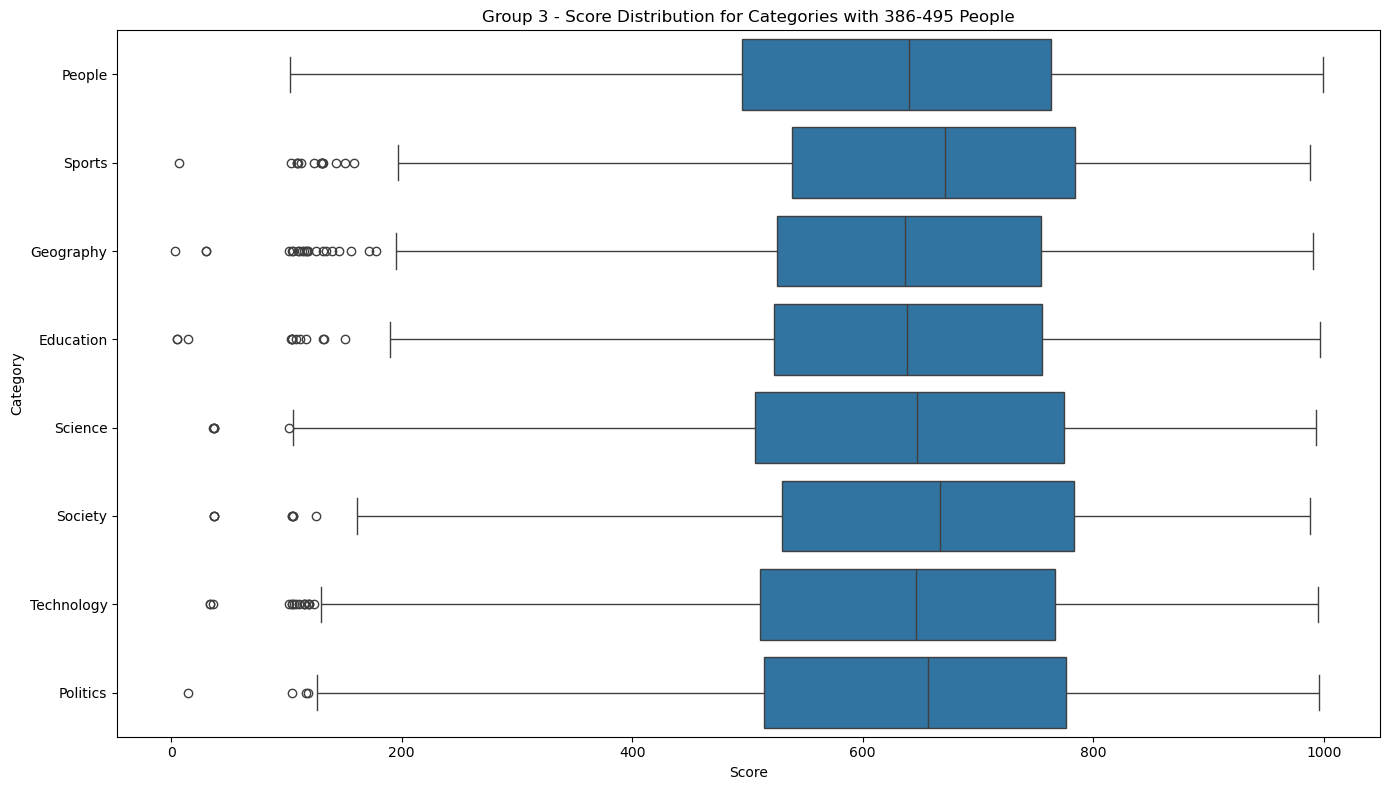

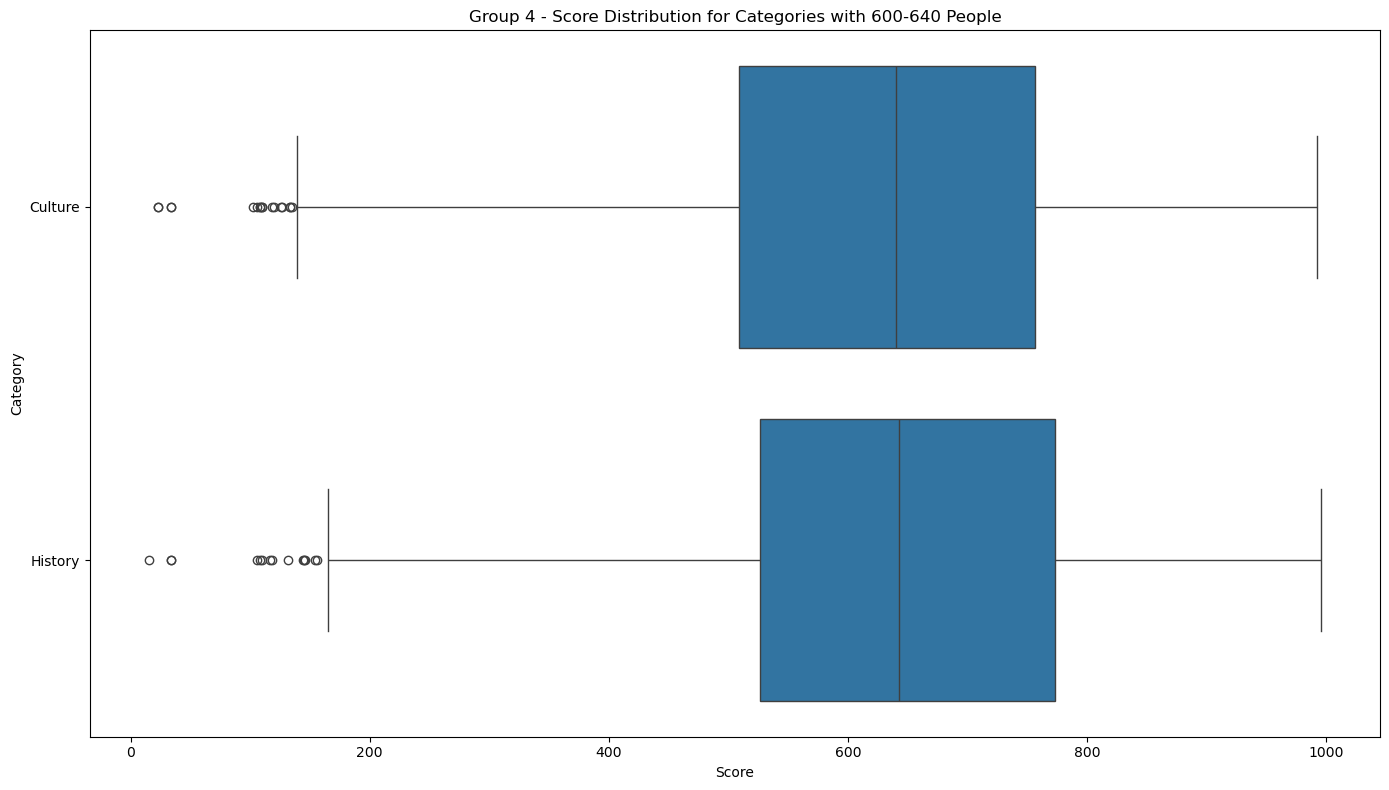

In [19]:

import json
import seaborn as sns


# List of categories to include in the plot
categories_to_include = [
    "Academic disciplines", "Business", "Communication", "Concepts", "Culture", "Economy", "Education", "Energy",
    "Engineering", "Entertainment", "Entities", "Food and drink", "Geography", "Government", "Health", "History",
    "Human behavior", "Humanities", "Information", "Internet", "Knowledge", "Language", "Law", "Life", "Lists", "Mass media",
    "Mathematics", "Military", "Nature", "People", "Philosophy", "Politics", "Religion", "Science", "Society", "Sports",
    "Technology", "Time", "Universe", "Other"
]

# Function to load and concatenate CSV files from a specific directory
def load_data(file_pattern):
    all_files = glob.glob(file_pattern)
    df_list = []
    for filename in all_files:
        try:
            df = pd.read_csv(filename)
            df_list.append(df)
        except pd.errors.ParserError:
            print(f"Skipping file {filename} due to parsing error.")
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

# Function to load user categories from JSON file and expand them
def load_user_categories(json_file):
    with open(json_file, 'r') as file:
        user_categories = json.load(file)
    
    # Convert the categories dictionary to a DataFrame with one row per username-category pair
    categories_expanded = []
    for username, categories in user_categories.items():
        for category in categories:
            categories_expanded.append({'username': username, 'Category': category})
    categories_df = pd.DataFrame(categories_expanded)
    return categories_df

# Function to plot score distribution in groups of categories based on user count
def plot_score_distribution_grouped(data, categories_df, selected_categories, score_column='total_score', min_count=20):
    # Convert score_column to numeric, coercing errors to NaN
    data[score_column] = pd.to_numeric(data[score_column], errors='coerce')
    data = data.dropna(subset=[score_column])

    # Merge categories with the main data on 'username'
    data = data.merge(categories_df, on='username')

    # Filter data to include only the selected categories
    data = data[data['Category'].isin(selected_categories)]

    # Calculate the number of people per category
    category_counts = data['Category'].value_counts()
    
    # Filter out categories with fewer than the minimum required count
    valid_categories = category_counts[category_counts >= min_count].index
    data = data[data['Category'].isin(valid_categories)]

    # Group categories by count ranges (e.g., categories with similar user counts)
    # Define group ranges based on quantiles or fixed intervals for simplicity
    count_bins = np.linspace(category_counts[valid_categories].min(), 
                             category_counts[valid_categories].max(), num=5)
    category_groups = {f'Group {i+1}': [] for i in range(len(count_bins)-1)}
    
    for category, count in category_counts[valid_categories].items():
        for i in range(len(count_bins) - 1):
            if count_bins[i] <= count < count_bins[i + 1]:
                category_groups[f'Group {i+1}'].append(category)
                break

    # Plot score distributions for each group of categories
    for i, (group_name, group_categories) in enumerate(category_groups.items()):
        if group_categories:  # Only plot if the group has categories
            min_count_in_group = min(category_counts[group_categories])
            max_count_in_group = max(category_counts[group_categories])
            plt.figure(figsize=(14, 8))
            sns.boxplot(x=score_column, y='Category', data=data[data['Category'].isin(group_categories)], orient='h')
            plt.xlabel('Score')
            plt.ylabel('Category')
            plt.title(f'{group_name} - Score Distribution for Categories with {min_count_in_group}-{max_count_in_group} People')
            plt.tight_layout()
            plt.show()

# Example usage
data = load_data('../../data/*.csv')  # Load CSV data
categories_df = load_user_categories('../../data/user_categories.json')  # Load and expand user categories

# Plot score distribution grouped by user count similarity, with categories having at least 20 people
plot_score_distribution_grouped(data, categories_df, categories_to_include)
